In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from warnings import filterwarnings
filterwarnings('ignore')


In [40]:
data = pd.read_csv('D:\\Academic\\sem 6\\ML\\Lab\\lab 3\\drug200.csv')

In [41]:
data.head()


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [42]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [43]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


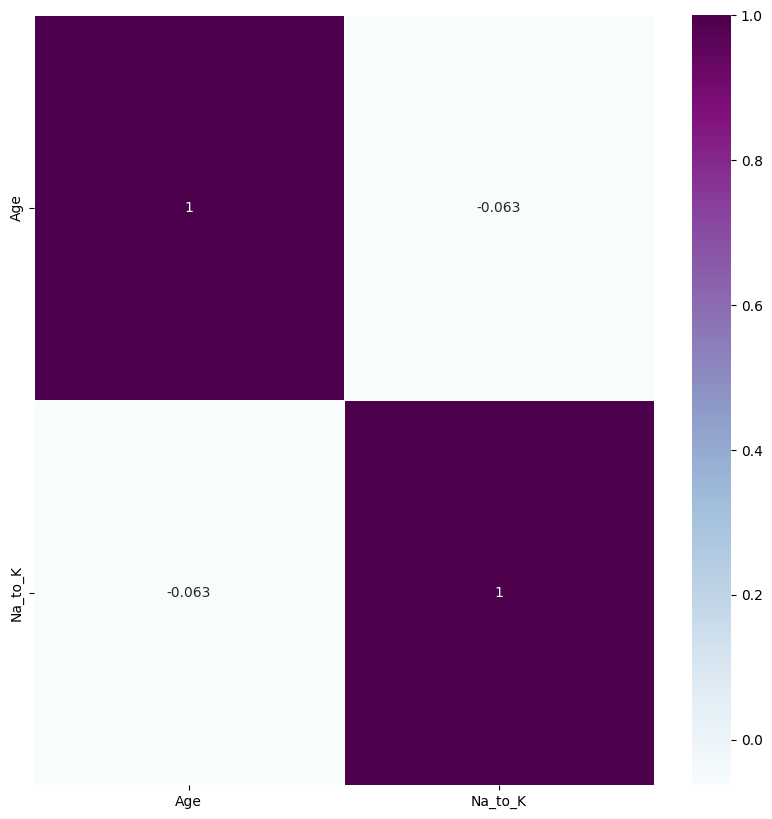

In [44]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(), cmap = 'BuPu', cbar = True, linewidth = 0.5, annot = True)
plt.show()

In [45]:
data['Drug'].value_counts()


drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

<Axes: xlabel='Drug', ylabel='count'>

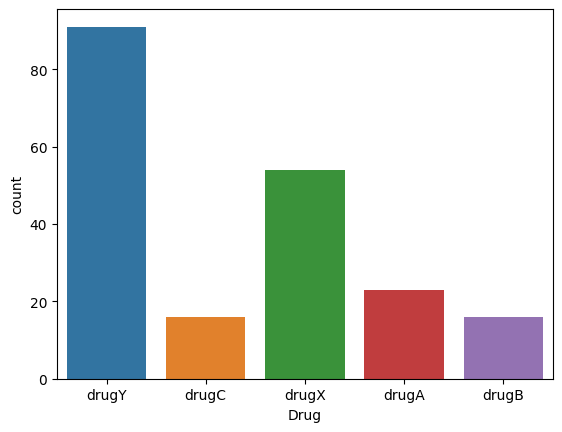

In [46]:
sns.countplot(x = 'Drug', data= data)

In [47]:
data['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

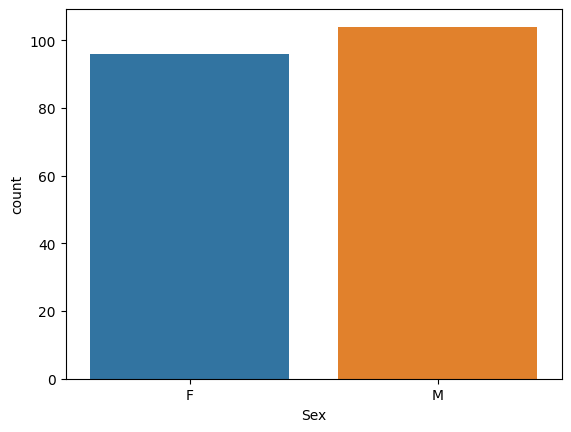

In [48]:
sns.countplot(x = 'Sex', data= data)


In [49]:
data['BP'].value_counts()

HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

<Axes: xlabel='BP', ylabel='count'>

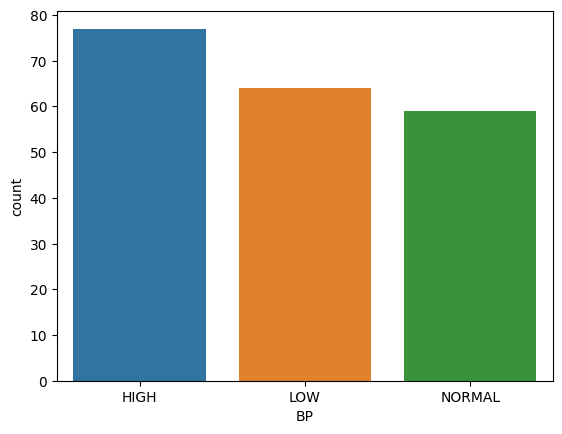

In [50]:
sns.countplot(x = 'BP', data= data)


In [51]:
data['Cholesterol'].value_counts()

HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

<Axes: xlabel='Cholesterol', ylabel='count'>

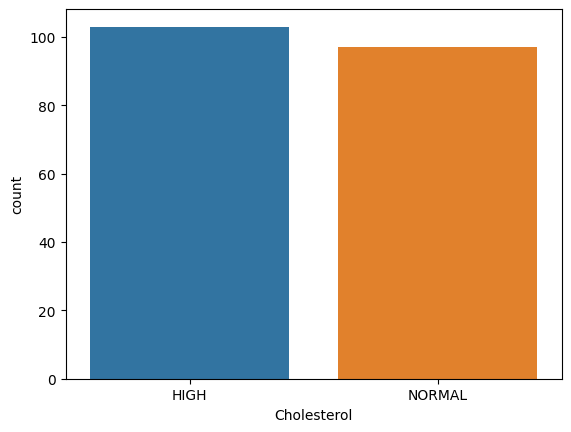

In [52]:
sns.countplot(x = 'Cholesterol', data= data)

In [53]:
data['Na_to_K'].describe()

count    200.000000
mean      16.084485
std        7.223956
min        6.269000
25%       10.445500
50%       13.936500
75%       19.380000
max       38.247000
Name: Na_to_K, dtype: float64

In [54]:
!pip install seaborn --upgrade

<Axes: xlabel='Na_to_K', ylabel='Density'>

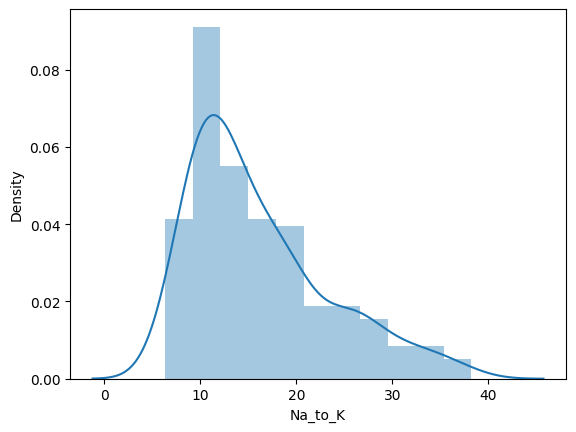

In [55]:
sns.distplot(data['Na_to_K'])

In [56]:
!pip install -U seaborn


<Axes: xlabel='Age', ylabel='Density'>

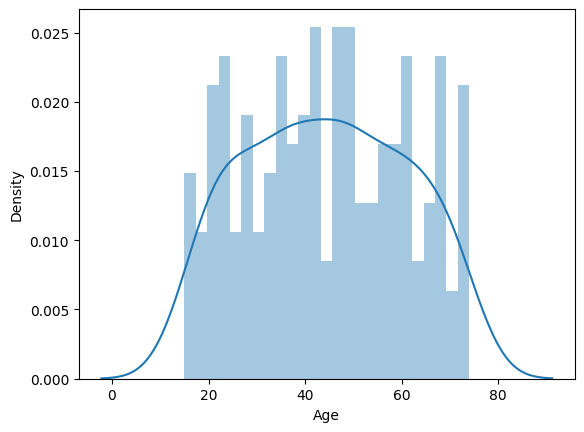

In [57]:
sns.distplot(data['Age'], hist=True,kde=True, bins = 25)


<Axes: xlabel='Age', ylabel='Na_to_K'>

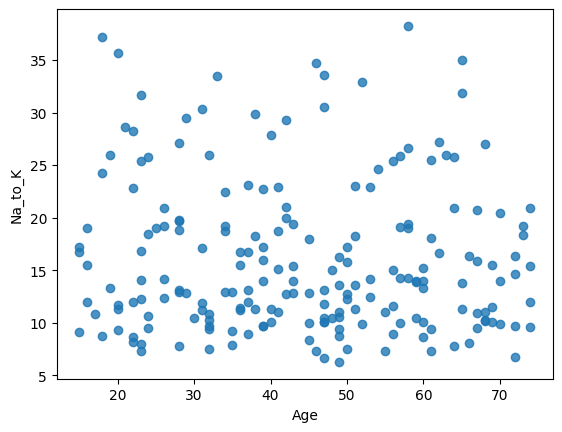

In [58]:
sns.regplot(x=data["Age"], y=data["Na_to_K"], fit_reg=False, scatter=True)

In [59]:
data_sex_drug = data.groupby(['Drug','Sex']).size().reset_index(name = 'count')
print(data_sex_drug)

    Drug Sex  count
0  drugA   F      9
1  drugA   M     14
2  drugB   F      6
3  drugB   M     10
4  drugC   F      7
5  drugC   M      9
6  drugX   F     27
7  drugX   M     27
8  drugY   F     47
9  drugY   M     44


<Axes: xlabel='Drug', ylabel='count'>

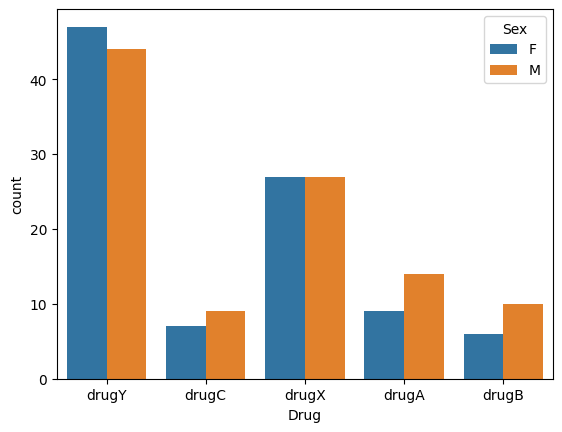

In [60]:
sns.countplot(x = 'Drug', data= data, hue = 'Sex')


In [61]:
data_BP_drug = data.groupby(['Drug','BP']).size().reset_index(name = 'count')
print(data_BP_drug)


    Drug      BP  count
0  drugA    HIGH     23
1  drugB    HIGH     16
2  drugC     LOW     16
3  drugX     LOW     18
4  drugX  NORMAL     36
5  drugY    HIGH     38
6  drugY     LOW     30
7  drugY  NORMAL     23


<Axes: xlabel='Drug', ylabel='count'>

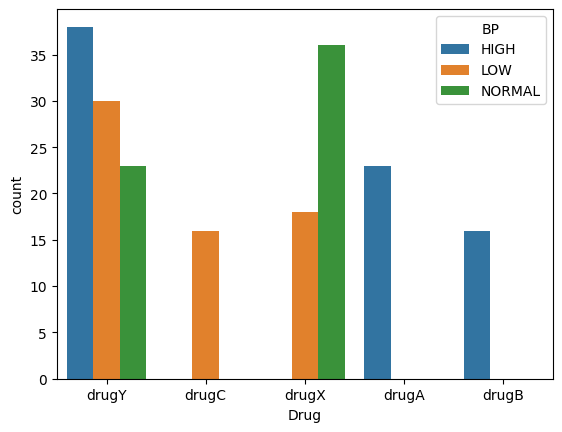

In [62]:
sns.countplot(x = 'Drug', data= data, hue = 'BP')

In [63]:
data_Cholesterol_drug = data.groupby(['Drug','Cholesterol']).size().reset_index(name='count')
print(data_Cholesterol_drug)

    Drug Cholesterol  count
0  drugA        HIGH     12
1  drugA      NORMAL     11
2  drugB        HIGH      8
3  drugB      NORMAL      8
4  drugC        HIGH     16
5  drugX        HIGH     20
6  drugX      NORMAL     34
7  drugY        HIGH     47
8  drugY      NORMAL     44


<Axes: xlabel='Drug', ylabel='count'>

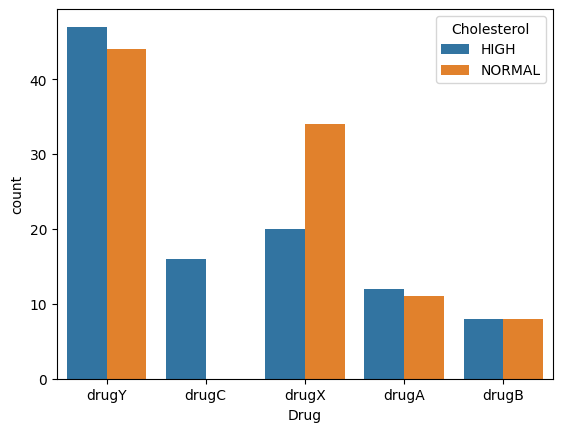

In [64]:
sns.countplot(x = 'Drug', data= data, hue = 'Cholesterol')

In [65]:
data['Sex'] = data['Sex'].map({'M': 1, 'F': 0})
data['Cholesterol'] = data['Cholesterol'].map({'HIGH' : 1, 'NORMAL' : 0})
data['Drug'] = data['Drug'].map({'drugY':1, 'drugC':2, 'drugX':3, 'drugA':4, 'drugB':5})
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,HIGH,1,25.355,1
1,47,1,LOW,1,13.093,2
2,47,1,LOW,1,10.114,2
3,28,0,NORMAL,1,7.798,3
4,61,0,LOW,1,18.043,1


In [66]:
data.shape

(200, 6)

In [67]:
data = pd.get_dummies(data)
data.head()


,Age,Sex,Cholesterol,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL
0,23,0,1,25.355,1,1,0,0
1,47,1,1,13.093,2,0,1,0
2,47,1,1,10.114,2,0,1,0
3,28,0,1,7.798,3,0,0,1
4,61,0,1,18.043,1,0,1,0


In [68]:
data.shape

(200, 8)

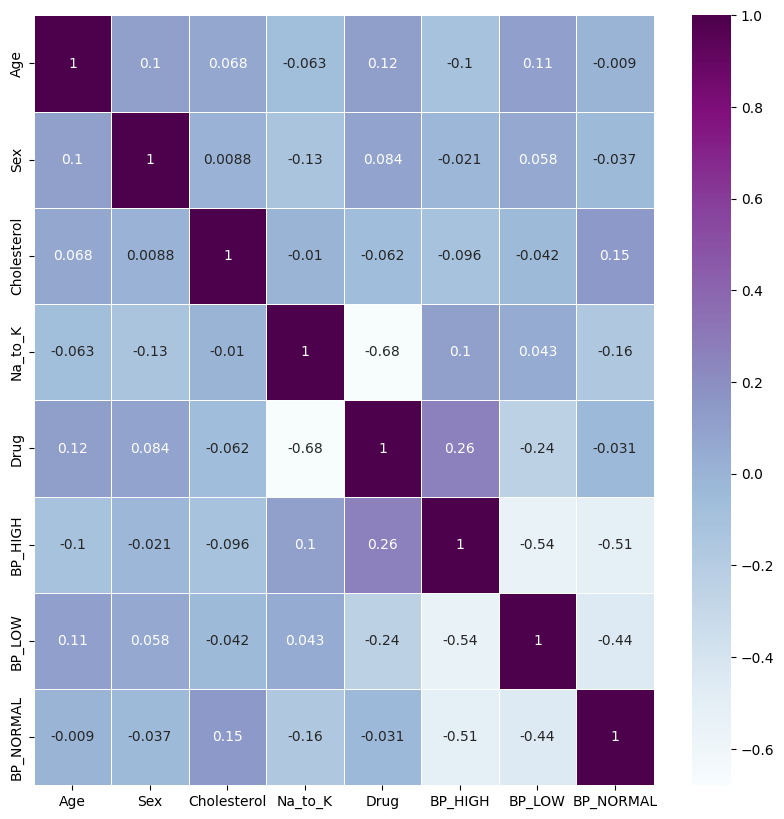

In [69]:
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(data.corr(), cmap = 'BuPu', cbar = True, linewidth = 0.5, annot = True)
plt.show()


In [70]:
X = data.drop('Drug', axis = 1).values
y = data['Drug'].values.reshape((-1,1))

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=None,shuffle=True,stratify=None)
print('x train shape {}'.format(X_train.shape))
print('x test shape {}'.format(X_test.shape))
print('y train shape {}'.format(y_train.shape))
print('y test shape {}'.format(y_test.shape))

x train shape (160, 7)
x test shape (40, 7)
y train shape (160, 1)
y test shape (40, 1)


In [72]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(C = 2 ,solver = 'liblinear', tol = .001)


In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [74]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)
print(logistic_model.score(X_train,y_train)*100)
logistic_score = accuracy_score(y_test, y_pred)
print(logistic_score*100)

98.125
95.0


In [75]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[15  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0 12  0  0]
 [ 0  0  0  5  1]
 [ 1  0  0  0  3]]
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        15
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00        12
           4       1.00      0.83      0.91         6
           5       0.75      0.75      0.75         4

    accuracy                           0.95        40
   macro avg       0.94      0.92      0.93        40
weighted avg       0.95      0.95      0.95        40

